In [307]:
import pandas as pd
import seaborn
import numpy as np

### Importing Data

In [308]:
df = pd.read_csv(r'C:\Users\wled3\ytdf17.csv')

### Data preprocessing 

Checking duplicates

In [309]:
df.duplicated().sum()


0

In [310]:
df = df.drop_duplicates()
df.shape

(22, 5)

Remove emojis and special characters

In [311]:
import re
def cleaning_comments(comment):
  comment = re.sub("[😃|🤣|🤭|🤣|😁|🤭|❤️|👍|🏴|😣|😠|💪|🙏|😞|🌺|🌸|🌞|🌻|💐|💓|😥|💔|😪|😑|🏽|😢|😑|😇|💜|🪴|🙌🏻|🇨🇦|🕊|🕯|😭|😔|💙|🏼|✝|🇿]+",'',str(comment))
  comment = re.sub("[\:|\@|\)|\*|\.|\$|\!|\?|\,|\%|\"|\(|\-|\”|\#|\!|\/|\«|\»|\&|\n|\'|\;|\!|<|>|\'|\’|\\\\]+"," ",str(comment))
  return comment

df['Comments'] = df['Comments'].apply(cleaning_comments)

Convert to lower case

In [312]:
lower = lambda x: x.lower()
df['Comments'] = df['Comments'].apply(lower)

Get the polarity with the stopwords

In [313]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#Create scores col
df['Scores'] = df['Comments'].apply(lambda x: sid.polarity_scores(x))

#Create compund score
df['Compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])

#label based on score
df['Polarity'] = df['Compound'].apply(lambda c: 'neutral' if -0.05 < c < 0.05 else ('negative' if c < -0.05 else 'positive'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [314]:
g = df['Compound'].sum()
d = df['Compound'].count()


total_score = g / d

total_score

0.19975909090909091

Get the polarity without the stopwords

In [315]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop = stopwords.words('english')

#Create comments without stopwords col
df['comments wo stopwords'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Add scores and polarity col without stopwords

In [316]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['Scores wo stopwords'] = df['comments wo stopwords'].apply(lambda x: sid.polarity_scores(x))

df['compound wo stopwords'] = df['Scores wo stopwords'].apply(lambda score_dict: score_dict['compound'])

df['polarity wo stopwords'] = df['compound wo stopwords'].apply(lambda c: 'neutral' if -0.05 < c < 0.05 else ('negative' if c < -0.05 else 'positive'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [317]:
x = df['compound wo stopwords'].sum()
z = df['compound wo stopwords'].count()

total_score2 = x / z
total_score2

0.21035454545454543

In [318]:
df["Length"] = df["Comments"].str.len()

Compare the polarity ratio with stopwords and without them

In [319]:
df['Polarity'].value_counts()

neutral     11
positive     9
negative     2
Name: Polarity, dtype: int64

In [320]:
gg = df[df["Polarity"] == "negative"]

gg["Polarity"].count()

2

In [321]:
df['polarity wo stopwords'].value_counts()

neutral     11
positive     9
negative     2
Name: polarity wo stopwords, dtype: int64

Checking the negative comments

In [322]:
neg = df[df["Polarity"] == "negative"]

neg.head(5)

,Name,Comments,Time,Likes,Reply Count,Scores,Compound,Polarity,comments wo stopwords,Scores wo stopwords,compound wo stopwords,polarity wo stopwords,Length
1,Autowing Automotive,can t understand anything its hard to understa...,2022-05-25T13:28:02Z,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.1027,negative,understand anything hard understand bruh😅🥲,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.1027,negative,55
9,Erica Zombie,useless,2021-05-31T10:05:47Z,1,1,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4215,negative,useless,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4215,negative,7


#### Investigating the relationship between comment length and polarity

In [323]:
a = df.groupby("Polarity")
a["Length"].mean()

Polarity
negative     31.0
neutral      72.0
positive    109.0
Name: Length, dtype: float64

It seems that negative comments tends to be longer

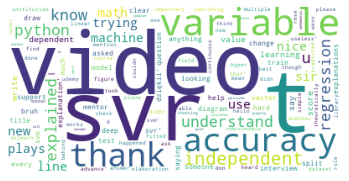

In [324]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comments = df["Comments"].values
b = WordCloud(background_color="white").generate(str(comments))

plt.imshow(b)
plt.axis("off")
plt.show()